In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import ravel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint as sp_randint
import datetime
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#read data
data = pd.read_csv('C:/application/interview_prep/bank-additional/bank-additional/bank_full_processed_le.csv')  
# visualize the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,0.481481,3,1,0,2,2,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
1,0.493827,7,1,3,1,2,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
2,0.246914,7,1,3,2,0,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
3,0.283951,0,1,1,2,2,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
4,0.481481,7,1,3,2,2,0,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0


# Model Building and Evaluation


- **Train Test Split** : Divide the Data set into Train class and Test class for model building and Evaluation


- Used **Stratification split** since the data is imbalanced. A random split might probably have changed the target distribution 

In [5]:
X = data.drop('y', axis=1)
y = data['y']

# SMOTE for oversampling the dataset


- Since the dataset is highly imbalanced containing approximate 88% of NO values in term deposite , training our model on such dataset will create a bias for undersample class(12% of YES values)


- To deal with this situation using SMOTE (Synthetic Minority Oversampling TEchnique) is a good option


- SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


- The combination of SMOTE and under-sampling performs better than plain under-sampling

In [6]:
print("Dataset shape before SMOTE:-")
print("X:", X.shape)
print("y:",y.shape)


Dataset shape before SMOTE:-
X: (41188, 22)
y: (41188,)


In [7]:
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y.values.ravel())
print("Dataset shape after SMOTE:-")
print("X:", X.shape)
print("y:",y.shape)

Dataset shape after SMOTE:-
X: (73096, 22)
y: (73096,)


- Split performed without Stratification

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Original:', (data.y).mean(), 'Train:', (y_train).mean(), 'Test:', (y_test).mean())

Original: 0.11265417111780131 Train: 0.5010089609412408 Test: 0.49596443228454173


- Split performed with Stratification

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
print('Original:', (data.y).mean(), 'Train:', (y_train).mean(), 'Test:', (y_test).mean())

Original: 0.11265417111780131 Train: 0.5 Test: 0.5


# Performing Different Algorithms to find the best fit for our dataset
- Will try following different algorithms to see which algorithm fits best on our dataset in terms of accuracy, ROC, AUC


- Performing Random Hyperparameter search and GridSearch for Hyperparameters, to select the best hyperparameters for a given algorithm

In [10]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier,
                          BaggingClassifier,
                          AdaBoostClassifier,
                          XGBClassifier,
                          
                          
                          ))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    try:
        feature_importances = np.mean([tree.feature_importances_ for tree in algo.estimators_], axis=0)
    except:
        feature_importances = 'none'
    
    return train_pred, test_pred, acc, acc_cv, probs,feature_importances

In [11]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [12]:
def make_confusion_matrix(y,y_pred,categories='auto',count=True,percent=True,cbar=True,xyticks=True,
                          figsize=(7,7),cmap='Blues',title=None):
    cf = confusion_matrix(y, y_pred)
    blanks = ['' for i in range(cf.size)]
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['No', 'Yes']

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        cm_sum = np.sum(cf, axis=1, keepdims=True)
        cm_perc = cf / cm_sum.astype(float) * 100
        annot = np.empty_like(cf).astype(str)
        nrows, ncols = cf.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cf[i, j]
            #p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%d/%d\n' % (c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%d\n' % (c)
        group_counts = list(annot.flat)
        
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
     # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if title:
        plt.title(title)

# Logistic Regression

Accuracy before CV: 74.85
Accuracy CV 10-Fold: 74.9
Running Time for the Algorithm to train and pred: 0:00:17.493490


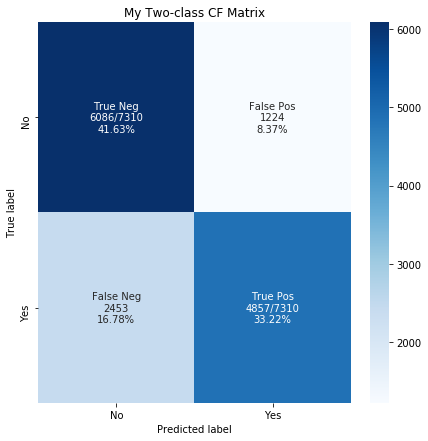

In [13]:
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log,feature_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print('\033[1m' + "Accuracy before CV: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=log_time))
make_confusion_matrix(y_test,test_pred_log, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.71      0.84      0.77     29238
           1       0.80      0.66      0.72     29238

    accuracy                           0.75     58476
   macro avg       0.76      0.75      0.75     58476
weighted avg       0.76      0.75      0.75     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      7310
           1       0.80      0.66      0.73      7310

    accuracy                           0.75     14620
   macro avg       0.76      0.75      0.75     14620
weighted avg       0.76      0.75      0.75     14620

ROC and AUC curve :-


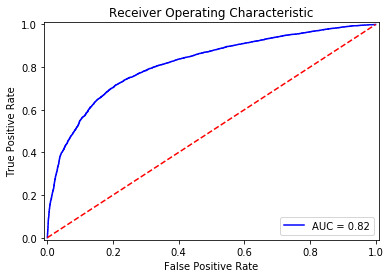

In [14]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_log))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_log))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_log)

# K-Nearest Neighbors

In [15]:
alpha = [x for x in range(1, 70, 7)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    predict_y = k_cfl.predict_proba(X_test)
    cv_auc_array.append(roc_auc_score(y_test, predict_y[:,1]))
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])
best_alpha = np.argmax(cv_auc_array)

AUC for k =  1 is 0.8751025991792066
AUC for k =  8 is 0.9137749667359705
AUC for k =  15 is 0.8977728445751092
AUC for k =  22 is 0.8842030294127005
AUC for k =  29 is 0.8747064437711585
AUC for k =  36 is 0.8670154539721274
AUC for k =  43 is 0.8604869741616622
AUC for k =  50 is 0.8547801579830864
AUC for k =  57 is 0.8494819794109226
AUC for k =  64 is 0.844141844183988


Accuracy before CV: 83.56
Accuracy CV 10-Fold: 83.07
Running Time for the Algorithm to train and pred: 0:00:17.221014


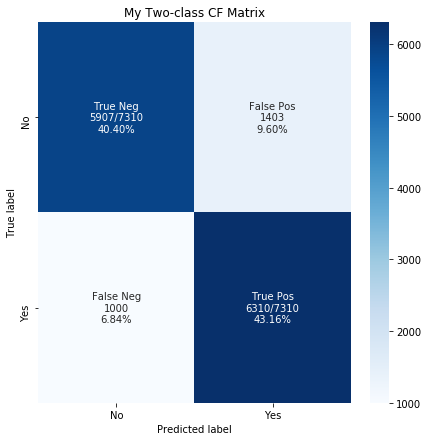

In [16]:

# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn,feature_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors=alpha[best_alpha],
                                                                                                   n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print('\033[1m' + "Accuracy before CV: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=knn_time))
make_confusion_matrix(y_test,test_pred_knn, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.85      0.80      0.83     29238
           1       0.81      0.86      0.84     29238

    accuracy                           0.83     58476
   macro avg       0.83      0.83      0.83     58476
weighted avg       0.83      0.83      0.83     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      7310
           1       0.82      0.86      0.84      7310

    accuracy                           0.84     14620
   macro avg       0.84      0.84      0.84     14620
weighted avg       0.84      0.84      0.84     14620

ROC and AUC curve :-


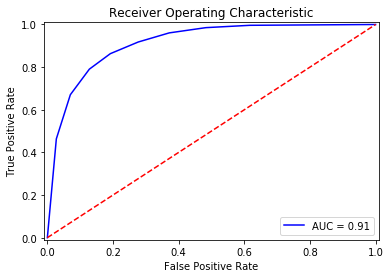

In [17]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_knn))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_knn))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_knn)

# Gaussian Naive Bayes

Accuracy: 67.61
Accuracy CV 10-Fold: 67.92
Running Time for the Algorithm to train and pred: 0:00:00.629996


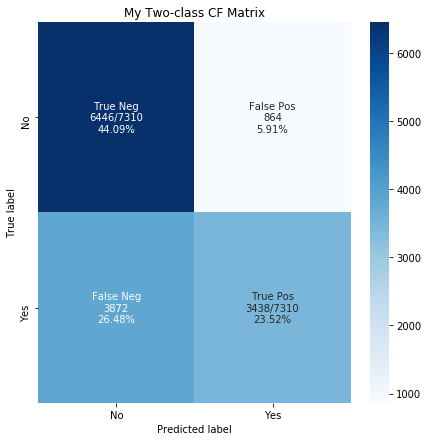

In [18]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau,feature_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print('\033[1m' +"Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=gaussian_time))
make_confusion_matrix(y_test,test_pred_gaussian, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.63      0.88      0.73     29238
           1       0.80      0.47      0.60     29238

    accuracy                           0.68     58476
   macro avg       0.72      0.68      0.67     58476
weighted avg       0.72      0.68      0.67     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      7310
           1       0.80      0.47      0.59      7310

    accuracy                           0.68     14620
   macro avg       0.71      0.68      0.66     14620
weighted avg       0.71      0.68      0.66     14620

ROC and AUC curve :-


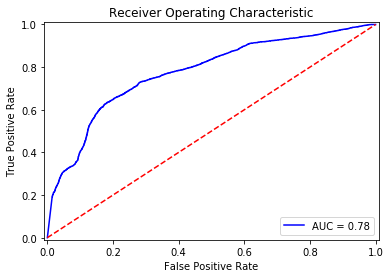

In [19]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_gaussian))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_gaussian))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_gau)

# Decision Tree Classifier

Accuracy: 89.91
Accuracy CV 10-Fold: 89.45
Running Time for the Algorithm to train and pred: 0:00:02.758005


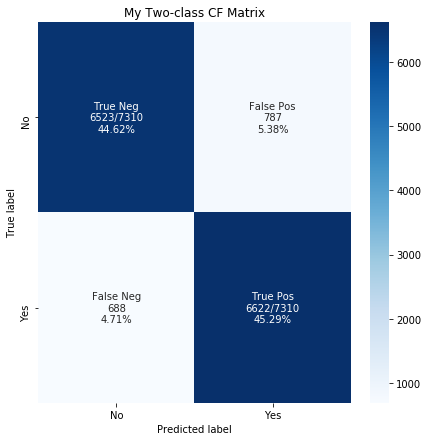

In [20]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt,feature_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print('\033[1m' + "Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=dt_time))
make_confusion_matrix(y_test,test_pred_dt, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     29238
           1       0.89      0.90      0.90     29238

    accuracy                           0.89     58476
   macro avg       0.89      0.89      0.89     58476
weighted avg       0.89      0.89      0.89     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7310
           1       0.89      0.91      0.90      7310

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90      0.90      0.90     14620

ROC and AUC curve :-


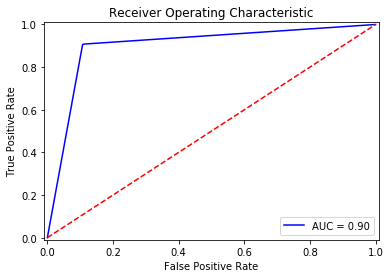

In [21]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_dt))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_dt))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_dt)

# Random Forest Classifier

Accuracy: 91.37
Accuracy CV 10-Fold: 90.89
Running Time for the Algorithm to train and pred: 0:00:05.201005


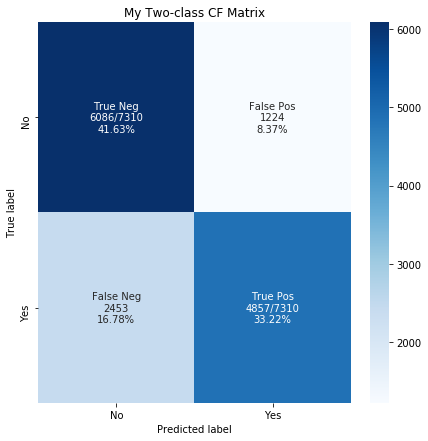

In [22]:

start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=5)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf,feature_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print('\033[1m' + "Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=rf_time))
make_confusion_matrix(y_test,test_pred_log, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     29238
           1       0.93      0.88      0.91     29238

    accuracy                           0.91     58476
   macro avg       0.91      0.91      0.91     58476
weighted avg       0.91      0.91      0.91     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7310
           1       0.94      0.89      0.91      7310

    accuracy                           0.91     14620
   macro avg       0.91      0.91      0.91     14620
weighted avg       0.91      0.91      0.91     14620

ROC and AUC curve :-


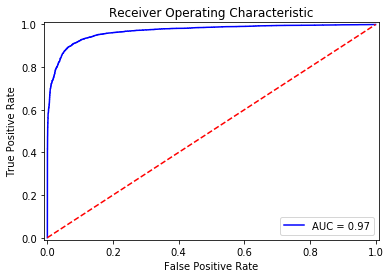

In [23]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_rf))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_rf))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_rf)

# Gradient Boosting Trees

Accuracy: 88.67
Accuracy CV 10-Fold: 88.2
Running Time for the Algorithm to train and pred: 0:01:13.178012


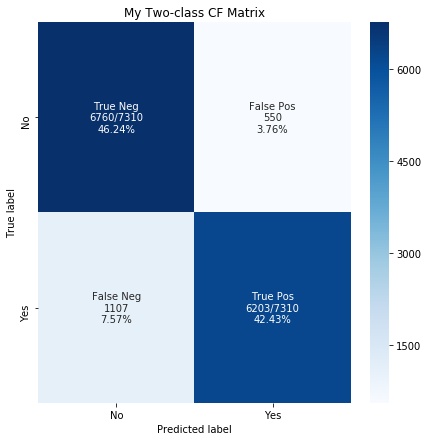

In [24]:
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt,feature_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print('\033[1m' +"Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=gbt_time))
make_confusion_matrix(y_test,test_pred_gbt, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     29238
           1       0.92      0.84      0.88     29238

    accuracy                           0.88     58476
   macro avg       0.88      0.88      0.88     58476
weighted avg       0.88      0.88      0.88     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7310
           1       0.92      0.85      0.88      7310

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620

ROC and AUC curve :-


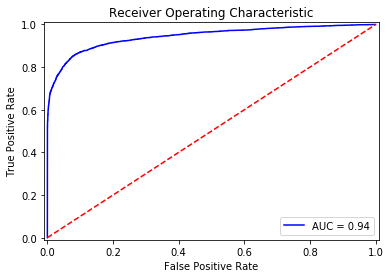

In [25]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_gbt))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_gbt))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_gbt)

# BaggingClassifier

Accuracy: 93.38
Accuracy CV 10-Fold: 92.99
Running Time for the Algorithm to train and pred: 0:03:43.391937


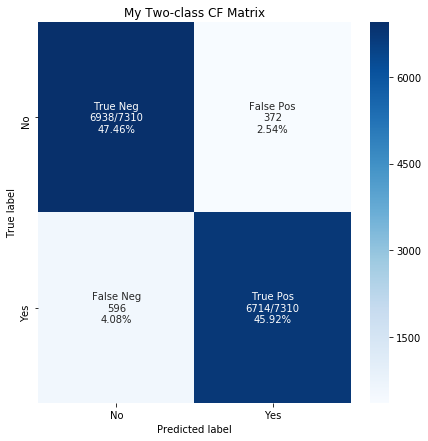

In [26]:
start_time = time.time()
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=100)
train_pred_bc, test_pred_bc, acc_bc, acc_cv_bc, probs_bc,feature_bc = fit_ml_algo(BaggingClassifier(base_estimator=dt_model, n_estimators=100,random_state=100), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
bc_time = (time.time() - start_time)
print('\033[1m' + "Accuracy: %s" % acc_bc)
print("Accuracy CV 10-Fold: %s" % acc_cv_bc)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=bc_time))
make_confusion_matrix(y_test,test_pred_bc, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     29238
           1       0.94      0.91      0.93     29238

    accuracy                           0.93     58476
   macro avg       0.93      0.93      0.93     58476
weighted avg       0.93      0.93      0.93     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7310
           1       0.95      0.92      0.93      7310

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

ROC and AUC curve :-


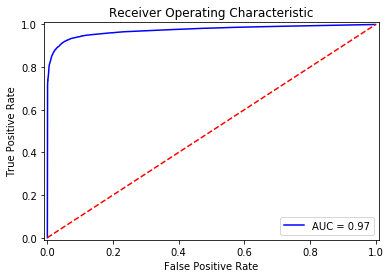

In [27]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_bc))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_bc))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_bc)

Text(0, 0.5, 'Feature Names')

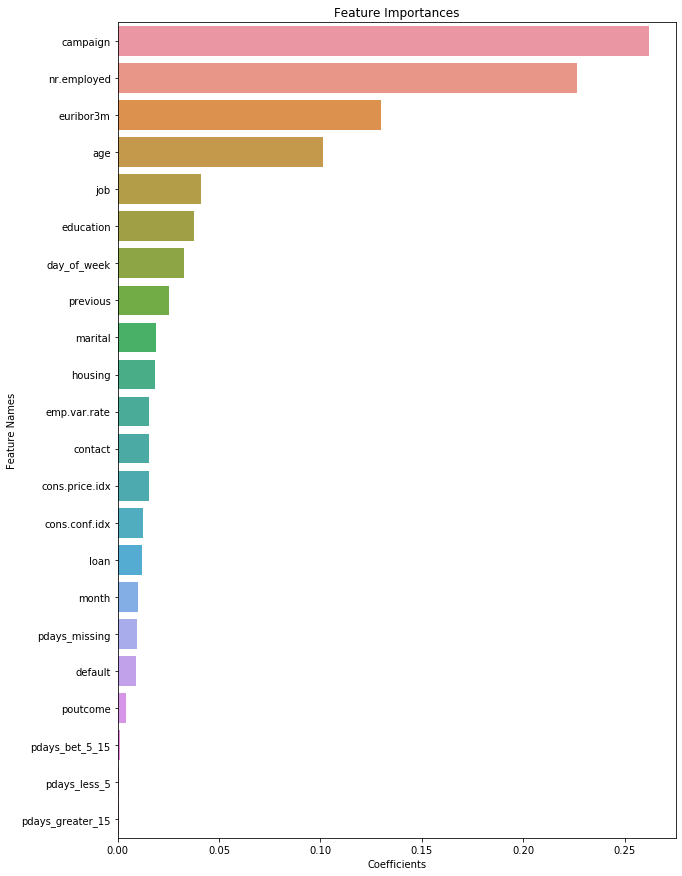

In [29]:
'''Plots feature importance in a sorted order and shows the most significant variables at the top'''
X1 = list(X.columns)
#X.remove('y_yes')
feature_importance_df = pd.DataFrame(data = feature_bc, index = X1, columns=['coefficient_values'])
feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
fig, ax = plt.subplots()
fig.set_size_inches(10, 15)
sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
plt.title('Feature Importances')
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')

# XGBoost

Accuracy: 90.65
Accuracy CV 10-Fold: 90.27
Running Time for the Algorithm to train and pred: 0:01:04.459892


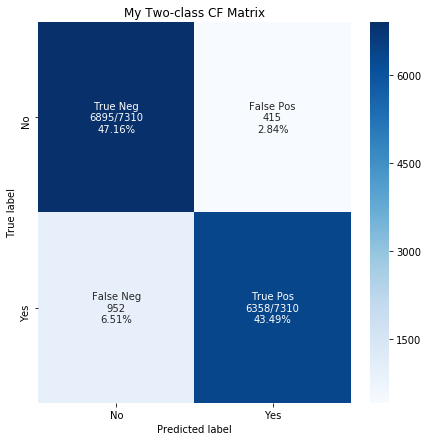

In [30]:
start_time = time.time()

train_pred_xgb1, test_pred_xgb1, acc_xgb1, acc_cv_xgb1, probs_xgb1, feature_xgb1 = fit_ml_algo(xgb.XGBClassifier(max_depth=5, n_estimators=100 ,class_weight='balanced', n_jobs=-1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
xgb_time1 = (time.time() - start_time)
print('\033[1m' + "Accuracy: %s" % acc_xgb1)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb1)
print("Running Time for the Algorithm to train and pred: %s" % datetime.timedelta(seconds=xgb_time1))
make_confusion_matrix(y_test,test_pred_xgb1, title='My Two-class CF Matrix')


Classification Report on Training :-
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     29238
           1       0.93      0.87      0.90     29238

    accuracy                           0.90     58476
   macro avg       0.90      0.90      0.90     58476
weighted avg       0.90      0.90      0.90     58476

Classification Report on Testing :-
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7310
           1       0.94      0.87      0.90      7310

    accuracy                           0.91     14620
   macro avg       0.91      0.91      0.91     14620
weighted avg       0.91      0.91      0.91     14620

ROC and AUC curve :-


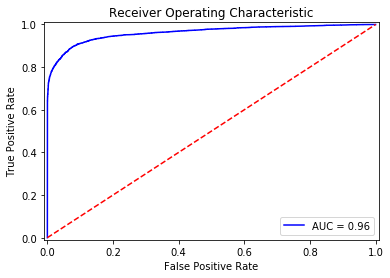

In [31]:
print("Classification Report on Training :-")
print (metrics.classification_report(y_train, train_pred_xgb1))
print("Classification Report on Testing :-")
print (metrics.classification_report(y_test, test_pred_xgb1))
print("ROC and AUC curve :-")
plot_roc_curve(y_test, probs_xgb1)

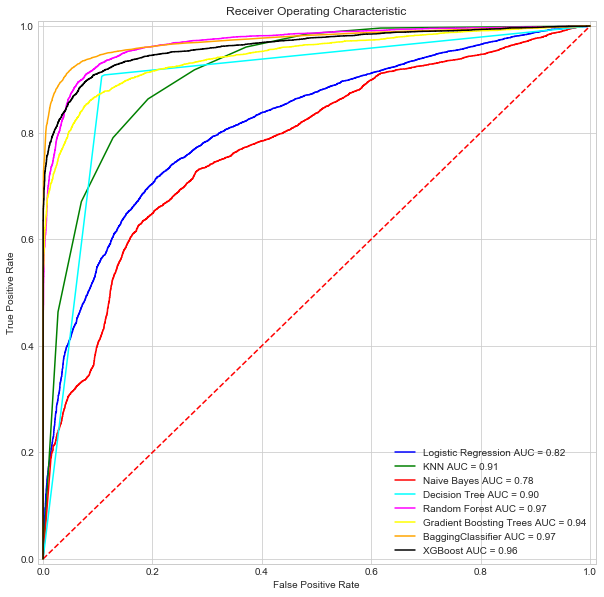

In [46]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [ 
    'Logistic Regression', 
    'KNN',
    'Naive Bayes',
    'Decision Tree', 
    'Random Forest', 
    'Gradient Boosting Trees',
    'BaggingClassifier',
    'XGBoost'
]
probs = [
    probs_log,
    probs_knn,
    probs_gau,
    probs_dt,
    probs_rf,
    probs_gbt,
    probs_bc,
    probs_xgb1
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'orange',
    'black'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()
